<a href="https://colab.research.google.com/github/guhasouvik/LASSO_BRCA/blob/main/LASSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold

In [3]:
df = pd.read_excel('/content/drive/MyDrive/bioinfo/BRCA_LABELLED.xlsx',header=None)

In [ ]:
print("Shape of the Dataset: {}".format(df.shape))

Shape of the Dataset: (196, 14001)


In [4]:
X = df.iloc[1:, 1:14001].values
Y = df.iloc[1:, 0].values

In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle= True)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle= True)
print("Shape of Train Features: {}".format(X_train.shape))
print("Shape of Test Features: {}".format(X_test.shape))
print("Shape of Train Target: {}".format(y_train.shape))
print("Shape of Test Target: {}".format(y_test.shape))

Shape of Train Features: (136, 14000)
Shape of Test Features: (59, 14000)
Shape of Train Target: (136,)
Shape of Test Target: (59,)


In [6]:
# parameters to be tested on GridSearchCV
params = {"alpha":np.arange(0.00001, 10, 500)}

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=5,shuffle=True, random_state=42)

# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X, Y)
print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': 1e-05}


In [8]:
names=df.iloc[0:1, 1:]
names=names.to_numpy().ravel()

In [7]:
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X_train, y_train)

# Using np.abs() to make coefficients positive.
lasso1_coef = np.abs(lasso1.coef_)
# plotting the Column Names and Importance of Columns.


In [ ]:
len(lasso1_coef)

14000

In [9]:
indices = [i for i, x in enumerate(lasso1_coef) if x == 0]

In [ ]:
len(indices)

12818

In [10]:
for i in sorted(indices, reverse=True):
  names=np.delete(names, i)

print(names)

['COL10A1' 'NEK2' 'MMP11' ... 'BNIP3P10' 'FTH1P6' 'RNU6-247P']


In [11]:
for i in sorted(indices, reverse=True):
  lasso1_coef=np.delete(lasso1_coef, i)

print(lasso1_coef)

[4.35299537e-01 6.05641702e-02 2.51849314e-02 ... 1.93483340e-04
 3.82722454e-04 1.05355522e-03]


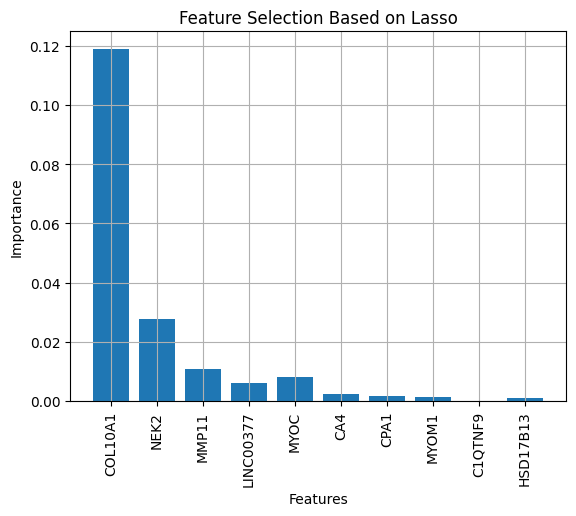

In [ ]:
plt.bar(names[0:10], lasso1_coef[0:10])
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [12]:
Z = [x for _,x in sorted(zip(lasso1_coef,names),reverse=True)]
print(Z)

['COL10A1', 'NEK2', 'HSD17B6', 'MRGPRF-AS1', 'INHBA', 'MMP11', 'MTHFD2P1', 'KIAA0408', 'STARD9', 'LMO7DN-IT1', 'LINC00377', 'PKHD1L1', 'RNU6-277P', 'LMOD1', 'SEL1L2', 'CLEC3B', 'ADAMTS9-AS2', 'HIF3A', 'GLRA4', 'CA4', 'SDS', 'MIR6500', 'GPIHBP1', 'ANLN', 'LRRTM2', 'ATIC', 'KLF15', 'ACVR1C', 'PAMR1', 'SGCZ', 'MYOC', 'PLK1', 'PYGM', 'MTOR-AS1', 'SERTM1', 'CDC25C', 'LIMS2', 'FAM13A', 'PPEF1', 'LMO7DN', 'PGM5P4', 'MIR6503', 'TPX2', 'MMP13', 'NR3C2', 'GTSE1', 'ERICH4', 'DACT2', 'NMNAT1P3', 'RBMS3-AS3', 'CYP1A1', 'IL11RA', 'LINC00968', 'SLC50A1', 'MIR100HG', 'MMP1', 'AVPR2', 'ADRA1A', 'MIR143', 'EZH1', 'PGM5-AS1', 'ADAM33', 'ERCC6L', 'SLC25A22', 'TRBV26OR9-2', 'SLC24A2', 'CHRNA1', 'TSPAN7', 'PTENP1-AS', 'ANGPT4', 'MIR6746', 'LRRTM4', 'ANGPTL7', 'MGAT3-AS1', 'OXCT1-AS1', 'ARL5AP3', 'LINC00445', 'RBM17P3', 'DLGAP5', 'AQP7P1', 'MIR8089', 'RNU1-36P', 'P2RX6', 'STAB2', 'HNRNPA1P66', 'LINC01537', 'SPATA9', 'ZNF300P1', 'MIR3153', 'GGT8P', 'HSPB2', 'TNXB', 'MIR23A', 'MATN2', 'OR10AB1P', 'HCAR2', 'PGA

In [13]:
lasso1_coef=np.sort(lasso1_coef)
lasso1_coef = lasso1_coef[::-1]

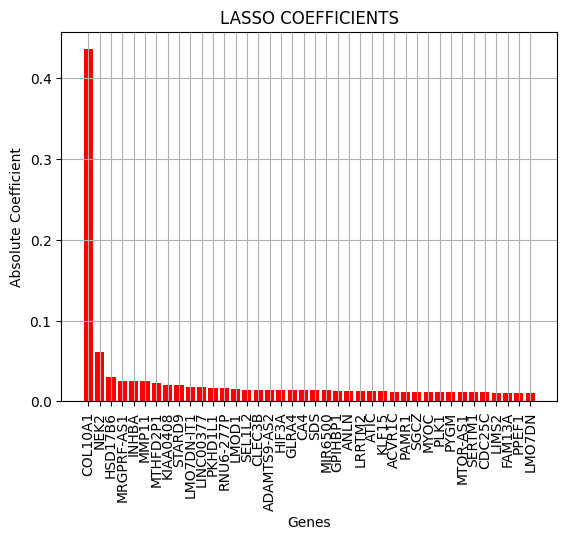

<Figure size 60000x10000 with 0 Axes>

In [14]:
plt.bar(Z[0:40], lasso1_coef[0:40],color='r')

plt.xticks(rotation=90,)
plt.grid()
plt.title("LASSO COEFFICIENTS")
plt.xlabel("Genes")
plt.ylabel("Absolute Coefficient")
plt.figure(figsize=(600,100))
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = lasso1.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred.round())
conf_matrix = confusion_matrix(y_test, y_pred.round())

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9661016949152542
Confusion Matrix:
[[32  1]
 [ 1 25]]


In [ ]:
Precision = metrics.precision_score(y_test, y_pred)
Precision*100

96.15384615384616

In [ ]:
Sensi = metrics.recall_score(y_test, y_pred)
Sensi*100

96.15384615384616

In [ ]:
Specificity = metrics.recall_score(y_test, y_pred,pos_label=0)
Specificity

0.9696969696969697

0.9656177156177157

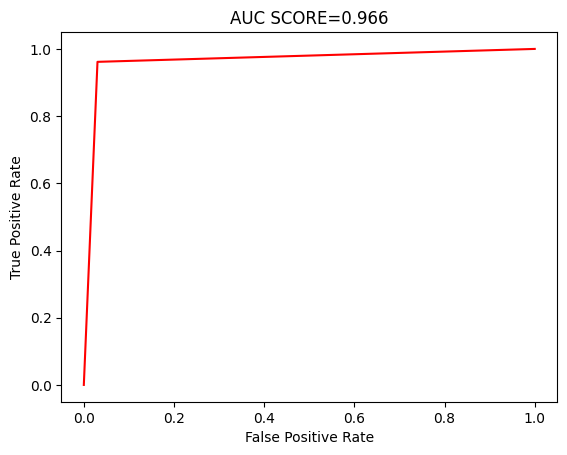

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr,color='r')
plt.title("AUC SCORE=0.966")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
roc_auc_score(y_test,y_pred)

In [ ]:
DF = pd.DataFrame(names)

# save the dataframe as a csv file
DF.to_csv("data1.csv")

In [ ]:
y_pred=y_pred.round()

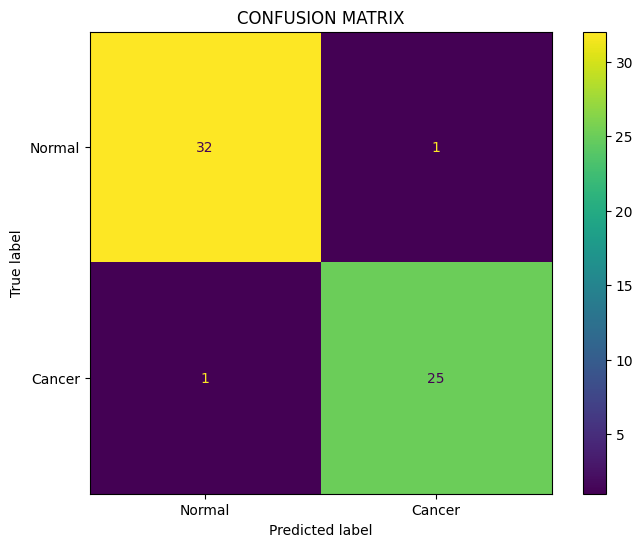

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels=["Normal","Cancer"])
ax.set(title='CONFUSION MATRIX')
#cm_display.plot()
cm_display.plot(ax=ax)


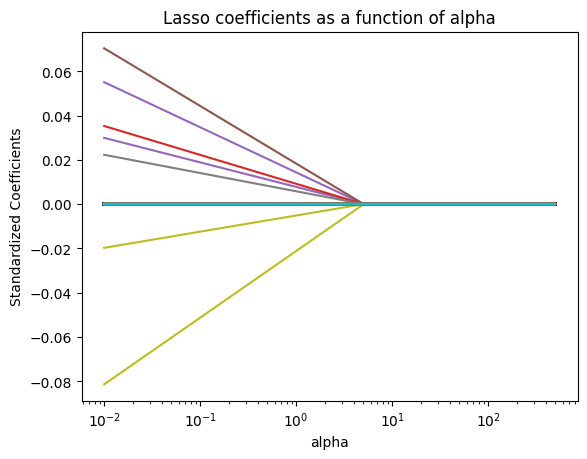

In [7]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train[0:9], y_train[0:9])
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [9]:
alphas = np.linspace(0.01,500,100)
plt.semilogx(lasso.alphas_, lasso.mse_path_, ":")
plt.plot(
    lasso.alphas_ ,
    lasso.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    lasso.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 50000, 250000
plt.ylim(ymin, ymax);

AttributeError: 'Lasso' object has no attribute 'alphas_'